In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import rcParams

In [45]:
data = pd.read_excel("CANDEV_PSC data.xlsx")

In [46]:
data.head()

,ID,ORGANISATION,GROUP,PROVINCE_FR,PROVINCE_EN,FIRST_LANGUAGE,PEOPLE_MINORITIES,INDIGENOUS_PEOPLES,PERSONS_WITH_DISABILITIES,APPLICATION_DATE,SALARY
0,1,Organisation B,AS01,Ontario (sauf la RCN),Ontario (except NCR),French,1,0,0,2021-11-24,55072.5
1,2,Organisation C,AS01,Alberta,Alberta,English,1,0,0,2021-06-28,55072.5
2,3,Organisation C,AS01,Ontario (sauf la RCN),Ontario (except NCR),English,0,0,1,2021-09-16,55072.5
3,4,Organisation B,AS01,Ontario (sauf la RCN),Ontario (except NCR),English,1,0,1,2021-11-21,55072.5
4,5,Organisation C,AS01,Québec (sauf la RCN),Quebec (except NCR),French,0,0,0,2021-09-22,55072.5


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30619 entries, 0 to 30618
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   ID                         30619 non-null  int64         
 1   ORGANISATION               30619 non-null  object        
 2   GROUP                      30619 non-null  object        
 3   PROVINCE_FR                30619 non-null  object        
 4   PROVINCE_EN                30619 non-null  object        
 5   FIRST_LANGUAGE             30619 non-null  object        
 6   PEOPLE_MINORITIES          30619 non-null  int64         
 7   INDIGENOUS_PEOPLES         30619 non-null  int64         
 8   PERSONS_WITH_DISABILITIES  30619 non-null  int64         
 9   APPLICATION_DATE           30619 non-null  datetime64[ns]
 10  SALARY                     30619 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage:

In [48]:
data.describe(include="all").T

C:\Users\noahr\AppData\Local\Temp/ipykernel_21784/3358381446.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include="all").T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
ID,30619.0,NaN,NaN,NaN,NaT,NaT,15318.932003,8845.018656,1.0,7662.5,15317.0,22976.5,30646.0
ORGANISATION,30619,6,Organisation C,20583,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GROUP,30619,79,PM02,4905,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PROVINCE_FR,30619,12,Québec (sauf la RCN),11691,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PROVINCE_EN,30619,12,Quebec (except NCR),11691,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FIRST_LANGUAGE,30619,2,English,18986,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PEOPLE_MINORITIES,30619.0,NaN,NaN,NaN,NaT,NaT,0.287109,0.45242,0.0,0.0,0.0,1.0,1.0
INDIGENOUS_PEOPLES,30619.0,NaN,NaN,NaN,NaT,NaT,0.036285,0.187001,0.0,0.0,0.0,0.0,1.0
PERSONS_WITH_DISABILITIES,30619.0,NaN,NaN,NaN,NaT,NaT,0.067148,0.250282,0.0,0.0,0.0,0.0,1.0
APPLICATION_DATE,30619,251,2021-11-30 00:00:00,859,2021-03-23,2021-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
data.shape

(30619, 11)

In [51]:
data.ORGANISATION.nunique()

6

In [73]:
data.isna().sum()

ID                           0
ORGANISATION                 0
GROUP                        0
PROVINCE_FR                  0
PROVINCE_EN                  0
FIRST_LANGUAGE               0
PEOPLE_MINORITIES            0
INDIGENOUS_PEOPLES           0
PERSONS_WITH_DISABILITIES    0
APPLICATION_DATE             0
SALARY                       0
dtype: int64

In [76]:
data.duplicated().sum()

0

In [78]:
data.drop("PROVINCE_FR",axis=1,inplace=True)

In [82]:
corr = data.corr()

In [89]:
corr

,ID,PEOPLE_MINORITIES,INDIGENOUS_PEOPLES,PERSONS_WITH_DISABILITIES,SALARY
ID,1.000000,0.011159,0.025687,0.020372,0.149752
PEOPLE_MINORITIES,0.011159,1.000000,-0.078359,-0.023161,-0.069922
INDIGENOUS_PEOPLES,0.025687,-0.078359,1.000000,0.055407,0.002038
PERSONS_WITH_DISABILITIES,0.020372,-0.023161,0.055407,1.000000,0.004704
SALARY,0.149752,-0.069922,0.002038,0.004704,1.000000


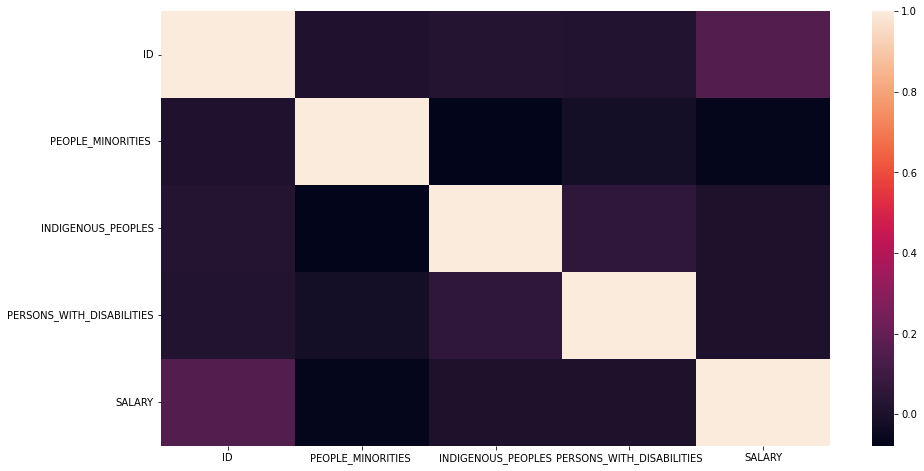

In [88]:
sns.heatmap(data=corr)
rcParams['figure.figsize'] = 15,20

In [52]:
data.groupby("ORGANISATION").sum()

,ID,PEOPLE_MINORITIES,INDIGENOUS_PEOPLES,PERSONS_WITH_DISABILITIES,SALARY
ORGANISATION,,,,,
Organisation A,2245293,27,6,16,1.891929e+07
Organisation B,40418244,1211,134,306,3.262408e+08
Organisation C,347500220,6257,728,1391,1.485834e+09
Organisation D,8537380,178,17,23,6.474666e+07
Organisation E,42442214,849,115,167,3.338378e+08
Organisation F,27907028,269,111,153,1.008039e+08


In [71]:
data.groupby(["INDIGENOUS_PEOPLES"]).agg({"INDIGENOUS_PEOPLES":"count"})

,INDIGENOUS_PEOPLES
INDIGENOUS_PEOPLES,
0,29508
1,1111


In [70]:
data.groupby(["PERSONS_WITH_DISABILITIES"]).agg({"PERSONS_WITH_DISABILITIES":"count"})

,PERSONS_WITH_DISABILITIES
PERSONS_WITH_DISABILITIES,
0,28563
1,2056


In [68]:
data.groupby(["PROVINCE_EN"]).agg({"PROVINCE_EN":"count"})

,PROVINCE_EN
PROVINCE_EN,
Alberta,1829
British Columbia,1971
Manitoba,967
New Brunswick,786
Newfoundland and Labrador,360
Northwest Territories,7
Nova Scotia,638
Ontario (except NCR),11630
Outside Canada,132


In [69]:
data.groupby(["ORGANISATION"]).agg({"PROVINCE_EN":"count"})

,PROVINCE_EN
ORGANISATION,
Organisation A,220
Organisation B,4223
Organisation C,20583
Organisation D,670
Organisation E,3678
Organisation F,1245


In [72]:
Northern_Canada = ["Newfoundland and Labrador", "Quebec", "Ontario", "Manitoba", "Saskatchewan", "Alberta", "British Columbia"]

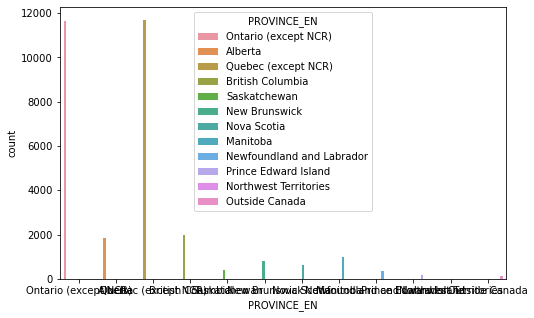

In [92]:
plt.figure(figsize=(8,5))
sns.countplot(x=data['PROVINCE_EN'],  hue=data['PROVINCE_EN'])
plt.show()

In [95]:
data.groupby(["APPLICATION_DATE"]).agg({"PROVINCE_EN":"count"})

,PROVINCE_EN
APPLICATION_DATE,
2021-03-23,6
2021-03-24,11
2021-03-25,8
2021-03-26,6
2021-03-28,23
...,...
2021-11-26,356
2021-11-27,184
2021-11-28,332
